<a href="https://colab.research.google.com/github/codeRisshi25/Statistical_Machine_Learning_Assignments/blob/main/SML_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LINEAR REGRESSION**

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('./Salary_Data.csv')

In [3]:
print (df.head(5))

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              NaN  43525.0
4              2.2  39891.0


In [4]:
print(df.isnull().count())

YearsExperience    30
Salary             30
dtype: int64


In [5]:
df['YearsExperience'].fillna(df['YearsExperience'].mean(), inplace=True)
df['Salary'].fillna(df['Salary'].mean(), inplace=True)
print(df.head(15))

    YearsExperience        Salary
0          1.100000  39343.000000
1          1.300000  46205.000000
2          1.500000  37731.000000
3          5.288889  43525.000000
4          2.200000  39891.000000
5          2.900000  56642.000000
6          3.000000  75773.821429
7          3.200000  54445.000000
8          3.200000  64445.000000
9          3.700000  57189.000000
10         3.900000  63218.000000
11         4.000000  55794.000000
12         4.000000  56957.000000
13         4.100000  57081.000000
14         4.500000  61111.000000


In [6]:
mean = df.mean()
median = df.median()
std = df.std()
stats_df = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Standard Deviation': std
})

# Print the result
print(stats_df)

                         Mean        Median  Standard Deviation
YearsExperience      5.288889      5.094444            2.658666
Salary           75773.821429  66983.500000        26939.419076


In [7]:
from sklearn.model_selection import train_test_split

x = df[['YearsExperience']]
y = df['Salary']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print (x_test," \n\n",y_test)


    YearsExperience
27              9.6
15              4.9
23              8.2
17              5.3
8               3.2
9               3.7  

 27    112635.0
15     67938.0
23    113812.0
17     83088.0
8      64445.0
9      57189.0
Name: Salary, dtype: float64


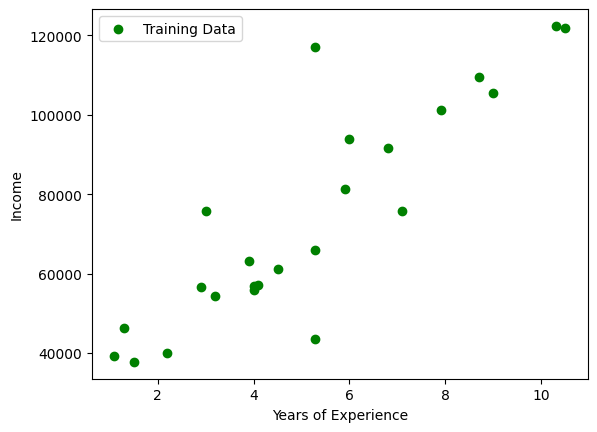

In [8]:
import matplotlib.pyplot as plt

plt.scatter(x_train,y_train,color="green",label="Training Data")
plt.xlabel("Years of Experience")
plt.ylabel("Income")
plt.legend()
plt.show()

In [11]:
x_train_mean = x_train.mean().YearsExperience
y_train_mean = y_train.mean()

# Calculate sum of squared differences for x
sum_sq_diff_x = ((x_train - x_train_mean)**2).sum().YearsExperience

# Calculate sum of product of differences for x and y
sum_prod_diff = ((x_train - x_train_mean).YearsExperience * (y_train - y_train_mean)).sum()

# Calculate slope (b1) and constant (b0)
slope = sum_prod_diff / sum_sq_diff_x
constant = y_train_mean - slope * x_train_mean

# Print constant (intercept)
print(f"Intercept (Constant): {constant}")

# Get user input for years of experience and calculate the expected salary
x = float(input("Enter years of Experience: "))
y = slope * x + constant
print(f"Expected Salary: {y}")

Intercept (Constant): 28013.787675495827
Enter years of Experience: 9.6
Expected Salary: 113473.44313734068


In [12]:
prediction_df = pd.DataFrame({'YearsExperience': x_test['YearsExperience'], 'Actual Salary': y_test, 'Predicted Salary': slope * x_test['YearsExperience'] + constant})

print(prediction_df)


    YearsExperience  Actual Salary  Predicted Salary
27              9.6       112635.0     113473.443137
15              4.9        67938.0      71633.820151
23              8.2       113812.0     101010.576716
17              5.3        83088.0      75194.639128
8               3.2        64445.0      56500.339496
9               3.7        57189.0      60951.363218


In [13]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, prediction_df['Predicted Salary'])
print(f"Mean Squared Error (MSE): {mse}")

r2 = r2_score(y_test, prediction_df['Predicted Salary'])
print(f"R-squared Score: {r2}")


Mean Squared Error (MSE): 52969444.15645271
R-squared Score: 0.8963001863623629


SECTION 2

Mean Squared Error (MSE): 52969444.15645272
R-squared Score: 0.8963001863623627
Slope (Coefficient): 8902.047443942174
Intercept (Constant): 28013.78767549582


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


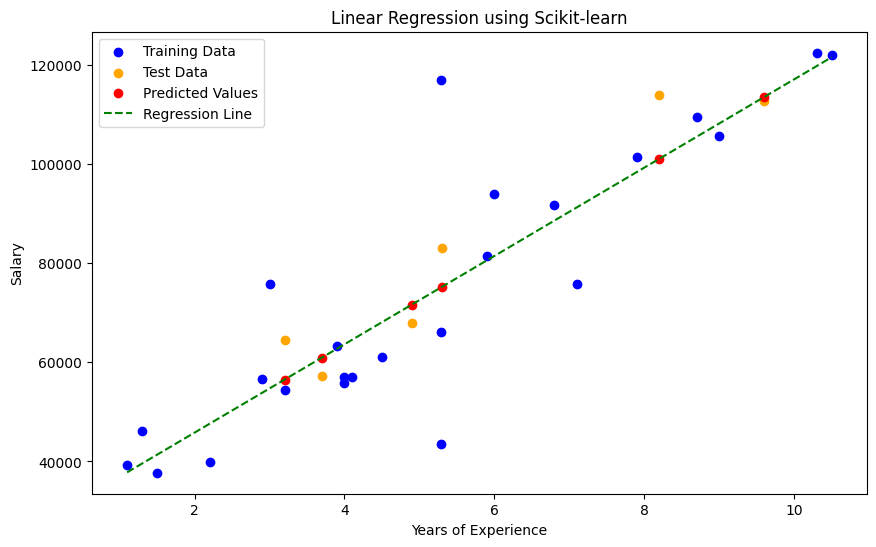

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared Score: {r2}")

# Get the coefficients (slope) and intercept (constant)
slope = model.coef_[0]
constant = model.intercept_

print(f"Slope (Coefficient): {slope}")
print(f"Intercept (Constant): {constant}")

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot training data
plt.scatter(x_train['YearsExperience'], y_train, color='blue', label='Training Data')

# Plot test data
plt.scatter(x_test['YearsExperience'], y_test, color='orange', label='Test Data')

# Plot predictions on test data
plt.scatter(x_test['YearsExperience'], y_pred, color='red', label='Predicted Values')

# Plot regression line
x_line = np.linspace(
    min(x_train['YearsExperience'].min(), x_test['YearsExperience'].min()),
    max(x_train['YearsExperience'].max(), x_test['YearsExperience'].max()),
    100
)
y_line = model.predict(x_line.reshape(-1, 1))
plt.plot(x_line, y_line, color='green', linestyle='--', label='Regression Line')

# Labels and title
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression using Scikit-learn')
plt.legend()

# Show plot
plt.show()

In [17]:
# prompt: Compare both outcomes from without inbuilt function (section 1) and using inbuilt
# function.

print(f"Manual Calculation - Slope (Coefficient): {slope}")
print(f"Manual Calculation - Intercept (Constant): {constant}")
print(f"Scikit-learn - Slope (Coefficient): {model.coef_[0]}")
print(f"Scikit-learn - Intercept (Constant): {model.intercept_}")

print(f"Manual Calculation - Mean Squared Error (MSE): {mse}")
print(f"Scikit-learn - Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred)}")

print(f"Manual Calculation - R-squared Score: {r2}")
print(f"Scikit-learn - R-squared Score: {r2_score(y_test, y_pred)}")


Manual Calculation - Slope (Coefficient): 8902.047443942174
Manual Calculation - Intercept (Constant): 28013.78767549582
Scikit-learn - Slope (Coefficient): 8902.047443942174
Scikit-learn - Intercept (Constant): 28013.78767549582
Manual Calculation - Mean Squared Error (MSE): 52969444.15645272
Scikit-learn - Mean Squared Error (MSE): 52969444.15645272
Manual Calculation - R-squared Score: 0.8963001863623627
Scikit-learn - R-squared Score: 0.8963001863623627
